In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import copy

In [187]:
digits = load_digits()

In [198]:
data = pd.DataFrame(digits.data)
target = digits['target'].reshape(-1,1)
target = (target == 5) + 0
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [199]:
print(data.shape)
print(target.shape)

(1797, 64)
(1797, 1)


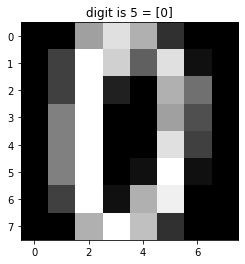

In [202]:
num = 30
images = digits.images
example_image = images[num]
plt.imshow(example_image, cmap=plt.get_cmap('gray'))
plt.title(f"digit is 5 = {target[num]}")
plt.show()

In [221]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=42)
X_train = X_train.values.reshape(64,-1)
X_test = X_test.values.reshape(64,-1)
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

In [222]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(64, 1527)
(1, 1527)
(64, 270)
(1, 270)


#  What is my architecture?

|   Input Layer |  First Hidden Layer   | Second Hidden Layer   |  Output Layer  |  
|---|:---:|---|---|
| $$A^{[0]} = X$$                   | $$Z^{[1]} = W^{[1] } A^{[0]} + b^{[1]}$$   |  $$Z^{[2]} = W^{[2] } A^{[1]} + b^{[2]}$$   |    $$Z^{[3]} = W^{[3] } A^{[2]} + b^{[3]}$$     |
|                                   | $$A^{[1]} = ReLU(Z^{[1]})$$                 |  $$A^{[2]} = ReLU(Z^{[2]})$$                 |    $$A^{[3]} = Sigmoid(Z^{[3]})$$                |
| | | | 
| | | | 
| | | | 
| | | | 
|                                   | $$W^{[1]}.shape = (n_{h}^{[1]}, n_x) $$               |  $$W^{[2]}.shape = (n_{h}^{[2]}, n_{h}^{[1]}) $$               |   $$W^{[3]}.shape = (n_{y}, n_{h}^{[2]}) $$                  |
| $$A^{[0]}.shape = (n_x, num\_examples) $$   | $$ Z^{[1]}.shape = (n_{h}^{[1]}, num\_examples) $$            |  $$ Z^{[2]}.shape = (n_{h}^{[2]}, num\_examples) $$            |      $$ Z^{[3]}.shape = (n_{y}, num\_examples) $$            |

# Теоретический материал

## Определение


<span style="font-family:Papyrus; font-size:2em;">
    Функция $ f:\mathbb{R}^m\rightarrow\mathbb{R}^n$ дифференцируема в точке $x_0$, если 
    $$f(x_0 + h) = f(x_0) + \color{#348FEA}{\left[D_{x_0} f \right]} (h) + \bar{\bar{o}} \left(\left| \left| h\right|\right|\right), $$
    где $\color{#348FEA}{\big[D_{x_0} f\big]}$ - дифференциал функции $f$
    
</span>



## Градиент сложной функции


<span style="font-family:Papyrus; font-size:2em;">
Формула производной сложной функции
$$\left[D_{x_0} (\color{#5002A7}{u} \circ \color{#4CB9C0}{v}) \right](h) = \color{#5002A7}{\left[D_{v(x_0)} u \right]} \left( \color{#4CB9C0}{\left[D_{x_0} v\right]} (h)\right)$$
Пусть $f(x) = g(h(x))$, тогда
    
$$\left[D_{x_0} f \right] (x-x_0) = \langle\nabla_{x_0} f, x-x_0\rangle.$$
    
С другой стороны,

$$\left[D_{h(x_0)} g \right] \left(\left[D_{x_0}h \right] (x-x_0)\right) = \langle\nabla_{h_{x_0}} g, \left[D_{x_0} h\right] (x-x_0)\rangle = \langle\left[D_{x_0} h\right]^* \nabla_{h(x_0)} g, x-x_0\rangle.$$
    
То есть $\color{#FFC100}{\nabla_{x_0} f} = \color{#348FEA}{\left[D_{x_0} h \right]}^* \color{#FFC100}{\nabla_{h(x_0)}}g$ - применение сопряженного к $D_{x_0} h$ линейного отображения к вектору $\nabla_{h(x_0)} g$
</span>


## Градиенты для типичных слоёв

### $f(x)=u(v(x))$ , где $x$ — вектор, а $v(x)$ – поэлементное применение $v$ $ \;\; \Rightarrow \;\; \color{#348FEA}{\nabla_{x_0} f  = v'(x_0) \odot \left[\nabla_{v(x_0)} u\right]}$

<span style="font-family:Papyrus; font-size:2em;">

$$v\begin{pmatrix}
 x_1 \\
 \vdots\\
 x_N
 \end{pmatrix}
 = \begin{pmatrix}
 v(x_1)\\
 \vdots\\
 v(x_N)
 \end{pmatrix}$$
</span>


<span style="font-family:Papyrus; font-size:2em;">
Тогда, как мы знаем,
    $$\left[D_{x_0} f\right] (h) = \langle\nabla_{x_0} f, h\rangle = \left[\nabla_{x_0} f\right]^T h.$$
    Следовательно,

$$\begin{multline*}
 \left[D_{v(x_0)} u\right] \left( \left[ D_{x_0} v\right] (h)\right) = \left[\nabla_{v(x_0)} u\right]^T \left(v'(x_0) \odot h\right)
 = \sum\limits_i \left[\nabla_{v(x_0)} u\right]_i v'(x_{0i})h_i 
 = \langle\left[\nabla_{v(x_0)} u\right] \odot v'(x_0), h\rangle.
 \end{multline*},$$
где ⊙ означает поэлементное перемножение. Окончательно получаем
  $$\color{#348FEA}{\nabla_{x_0} f = \left[\nabla_{v(x_0)}u\right] \odot v'(x_0) = v'(x_0) \odot \left[\nabla_{v(x_0)} u\right]}$$

    
</span>


### $f(X) = g(XW)$, где $X$ и $W$ - матрицы  $ \;\; \Rightarrow \;\; \color{#348FEA}{\nabla_{X_0} f = \left[\nabla_{X_0W} (g) \right] \cdot W^T}$

<span style="font-family:Papyrus; font-size:2em;">

Как мы знаем, 
    $$\left[D_{X_0} f \right] (X-X_0) = \text{tr}\, \left(\left[\nabla_{X_0} f\right]^T (X-X_0)\right)$$
Тогда
    $$\begin{multline*}
 \left[ D_{X_0W} g \right]  \left(\left[D_{X_0} \left( \ast W\right)\right] (H)\right) = 
 \left[ D_{X_0W} g \right]  \left(HW\right)=\\
  = \text{tr}\, \left( \left[\nabla_{X_0W} g \right]^T \cdot (H) W \right) =\\
 =
  \text{tr} \, \left(W \left[\nabla_{X_0W} (g) \right]^T \cdot (H)\right) = \text{tr} \, \left( \left[\left[\nabla_{X_0W} g\right] W^T\right]^T (H)\right)
 \end{multline*}$$

Здесь через $\ast W$ обозначено отображение $Y \hookrightarrow  YW$, а в предпоследнем переходе использовалось следующее свойство следа:
    $$\text{tr} \, (A B C) = \text{tr} \, (C A B),$$
где $A,B,C$ — произвольные матрицы подходящих размеров (то есть допускающие перемножение в обоих приведённых порядках). Следовательно, получаем
    $$\color{#348FEA}{\nabla_{X_0} f = \left[\nabla_{X_0W} (g) \right] \cdot W^T}$$
</span>


### $f(W) = g(XW)$, где $W$ и $X$ — матрицы $ \;\; \Rightarrow \;\; \color{#348FEA}{\nabla_{X_0} f = X^T \cdot \left[\nabla_{XW_0} (g)\right]}$

<span style="font-family:Papyrus; font-size:2em;">
 Для приращения $H=W−W_0$ имеем
    $$\left[D_{W_0} f \right] (H) = \text{tr} \, \left( \left[\nabla_{W_0} f \right]^T (H)\right)$$
    Тогда
    $$\begin{multline*}
 \left[D_{XW_0} g \right] \left( \left[D_{W_0} \left(X \ast\right) \right] (H)\right) = \left[D_{XW_0} g \right] \left( XH \right) = \\
 = \text{tr} \, \left( \left[\nabla_{XW_0} g \right]^T \cdot X (H)\right) =
  \text{tr}\, \left(\left[X^T \left[\nabla_{XW_0} g \right] \right]^T (H)\right)
 \end{multline*}$$

Здесь через $X \ast$ обозначено отображение $Y \hookrightarrow XY$. Значит,
    $$\color{#348FEA}{\nabla_{X_0} f = X^T \cdot \left[\nabla_{XW_0} (g)\right]}$$
    
</span>


# How to do backward propagation in this case?
$\huge \frac{\partial \mathcal{L}}{\partial W^{[1]}}, \frac{\partial \mathcal{L}}{\partial b^{[1]}}, \frac{\partial \mathcal{L}}{\partial W^{[2]}} , \frac{\partial \mathcal{L}}{\partial b^{[2]}}, \frac{\partial \mathcal{L}}{\partial W^{[3]}}, \frac{\partial \mathcal{L}}{\partial b^{[3]}}?$


$$ \Large  \mathcal{L}(A^{[3]}, Y) = -\frac{1}{m} \sum_{i=1}^{m}y_i log(A^{[3]}_i) + (1 - y_i) log(1 - A^{[3]}_i) = -\frac{1}{m}( Y^T log(A^{[3]}) + (1 - Y)^T log(1 - A^{[3]})) $$

$$ \Large  A^{[3]}= Sigmoid(Z^{[3]})$$

 $$ \Large  Z^{[3]} = W^{[3] } A^{[2]} + b^{[3]}$$ 
  $$ \Large  A^{[2]} = ReLU(Z^{[2]})$$    
   $$ \Large  Z^{[2]} = W^{[2] } A^{[1]} + b^{[2]}$$   
   $$  \Large A^{[1]} = ReLU(Z^{[1]})$$ 
   $$  \Large  Z^{[1]} = W^{[1] } A^{[0]} + b^{[1]}$$ 

## $\large \underbrace{\frac{\partial \mathcal{L}}{\partial W^{[3]}}}_{n_{y} \times n_{h}^{[2]}} = \frac{1}{m} \underbrace{\left(A^{[3]}_{0} - Y \right)}_{n_{y} \times m} \underbrace{A^{[2]T}_{0}}_{m \times n_{h}^{[2]}}$

$\Large \nabla_{W^{[3]}_{0}} \mathcal{L}=  \nabla_{W^{[3]}_{0}} \left( \mathcal{L} \circ \sigma \circ \left[W^{[3]} \mapsto W^{[3]}A^{[2]} + b^{[3]} \right] \right) $

$\Large = \nabla_{W^{[3]}_{0}A^{[2]} + b^{[3]} } \left( \mathcal{L} \circ \sigma \right) A^{[2]T}_{0}  = $

$\Large  = \nabla_{ Z^{[3]}_{0} } \left( \mathcal{L} \circ \sigma \right) A^{[2]T}_{0}  = \sigma'(Z^{[3]}_{0}) \odot \left[  \nabla_{ A^{[3]}_{0} }  \mathcal{L}  \right] A^{[2]T}_{0} = $

$\Large = A^{[3]}_{0} \odot (1 - A^{[3]}_{0}) \odot \left[ \left(\frac{1}{ A^{[3]}_{0}} \odot -\frac{1}{m}Y \right) + \left(\frac{1}{1 - A^{[3]}_{0}} \odot \frac{1}{m}(1 - Y) \right)    \right] A^{[2]T}_{0}  $ 

$\Large  = \left[ \left(1 - A^{[3]}_{0} \odot -\frac{1}{m}Y \right) + \left(A^{[3]}_{0} \odot \frac{1}{m}(1 - Y) \right)    \right] A^{[2]T}$

$= \Large \frac{1}{m} \left(A^{[3]}_{0} - Y \right)A^{[2]T}_{0}$


## $\large \underbrace{\frac{\partial \mathcal{L}}{\partial b^{[3]}}}_{n_{y} \times 1} = \frac{1}{m} np.sum(\underbrace{A^{[3]}_{0} - Y}_{n_{y} \times m} , axis=1, keepdims=True)$  

$\Large \nabla_{b^{[3]}_{0}} \mathcal{L}=  \nabla_{b^{[3]}_{0}} \left( \mathcal{L} \circ \sigma \circ \left[b^{[3]} \mapsto W^{[3]}A^{[2]} + b^{[3]} \right] \right) $

$\Large = \nabla_{W^{[3]}_{0}A^{[2]} + b^{[3]} } \left( \mathcal{L} \circ \sigma \right) \mathbb{1}^T = $

$\Large  = \nabla_{ Z^{[3]}_{0} } \left( \mathcal{L} \circ \sigma \right) A^{[2]T}_{0}  = \sigma'(Z^{[3]}_{0}) \odot \left[  \nabla_{ A^{[3]}_{0} }  \mathcal{L}  \right]  \mathbb{1}^T = $

$\Large = A^{[3]}_{0} \odot (1 - A^{[3]}_{0}) \odot \left[ \left(\frac{1}{ A^{[3]}_{0}} \odot -\frac{1}{m}Y \right) + \left(\frac{1}{1 - A^{[3]}_{0}} \odot \frac{1}{m}(1 - Y) \right)    \right]  \mathbb{1}^T $ 

$\Large  = \left[ \left(1 - A^{[3]}_{0} \odot -\frac{1}{m}Y \right) + \left(A^{[3]}_{0} \odot \frac{1}{m}(1 - Y) \right)    \right] \mathbb{1}^T$

$= \Large \frac{1}{m} \left(A^{[3]}_{0} - Y \right) \mathbb{1}^T = \frac{1}{m} np.sum(A^{[3]}_{0} - Y , axis=1, keepdims=True)$

##  $ \underbrace{\frac{\partial \mathcal{L}}{\partial W^{[2]}}}_{n_{h}^{[2]} \times n_{h}^{[1]}} =  \Large \frac{1}{m} \underbrace{np.heaviside(Z^{[2]}_{0}, 0)}_{n_{h}^{[2]} \times m } \odot \left[\underbrace{W^{[3]T}_{0}}_{n_{h}^{[2]}  \times n_{y}  } \underbrace{\left(A^{[3]}_{0} - Y \right)}_{n_{y} \times m} \right] \underbrace{A^{[1]T}_{0}}_{m \times n^{[1]}_{h} }$ 

$\Large \nabla_{W^{[2]}_{0}} \mathcal{L}=  \nabla_{W^{[2]}_{0}} \left( \mathcal{L} \circ \sigma \circ \left[A^{[2]} \mapsto W^{[3]}A^{[2]} + b^{[3]} \right]  \circ ReLU \circ  \left[W^{[2]} \mapsto W^{[2]}A^{[1]} + b^{[2]} \right] \right) = $

$= \Large  \nabla_{Z^{[2]}_{0}} \left( \mathcal{L} \circ \sigma \circ \left[A^{[2]} \mapsto W^{[3]}A^{[2]} + b^{[3]} \right]  \circ ReLU  \right)A^{[1]T}_{0} = $

$= \Large  np.max(0,Z^{[2]}_{0}) \odot \left[\nabla_{A^{[2]}_{0}} \left( \mathcal{L} \circ \sigma \circ \left[A^{[2]} \mapsto W^{[3]}A^{[2]} + b^{[3]} \right] \right) \right] A^{[1]T}_{0} =$

$= \Large  np.max(0,Z^{[2]}_{0}) \odot \left[W^{[3]T}_{0} \nabla_{Z^{[3]}_{0}} \left( \mathcal{L} \circ \sigma \right) \right] A^{[1]T}_{0} =$

$= \Large  np.max(0,Z^{[2]}_{0}) \odot \left[W^{[3]T}_{0} \frac{1}{m} \left(A^{[3]}_{0} - Y \right) \right] A^{[1]T}_{0}$




##  $ \underbrace{\frac{\partial \mathcal{L}}{\partial b^{[2]}}}_{n_{h}^{[2]} \times 1} =  \frac{1}{m} np.sum(\underbrace{np.heaviside(Z^{[2]}_{0}, 0)}_{n_{h}^{[2]} \times m} \odot \left[\underbrace{W^{[3]T}_{0}}_{n_{h}^{[2]}  \times n_{y} }  \underbrace{\left( A^{[3]}_{0} - Y \right)}_{n_{y} \times m} \right], axis = 1, keepdims=True)$

$\Large \nabla_{b^{[2]}_{0}} \mathcal{L}=  \nabla_{b^{[2]}_{0}} \left( \mathcal{L} \circ \sigma \circ \left[A^{[2]} \mapsto W^{[3]}A^{[2]} + b^{[3]} \right]  \circ ReLU \circ  \left[b^{[2]} \mapsto W^{[2]}A^{[1]} + b^{[2]} \right] \right) = $

$= \Large  \nabla_{Z^{[2]}_{0}} \left( \mathcal{L} \circ \sigma \circ \left[A^{[2]} \mapsto W^{[3]}A^{[2]} + b^{[3]} \right]  \circ ReLU  \right)\mathbb{1}^T= $

$= \Large  np.max(0,Z^{[2]}_{0}) \odot \left[\nabla_{A^{[2]}_{0}} \left( \mathcal{L} \circ \sigma \circ \left[A^{[2]} \mapsto W^{[3]}A^{[2]} + b^{[3]} \right] \right) \right] \mathbb{1}^T =$

$= \Large  np.max(0,Z^{[2]}_{0}) \odot \left[W^{[3]T}_{0} \nabla_{Z^{[3]}_{0}} \left( \mathcal{L} \circ \sigma \right) \right] \mathbb{1}^T =$

$= \Large  np.max(0,Z^{[2]}_{0}) \odot \left[W^{[3]T}_{0} \frac{1}{m} \left(A^{[3]}_{0} - Y \right) \right] \mathbb{1}^T = $

$ = \Large  \frac{1}{m} np.sum( np.max(0,Z^{[2]}_{0}) \odot \left[W^{[3]T}_{0} \left(A^{[3]}_{0} - Y \right) \right], axis = 1, keepdims=True)$


##  $ \underbrace{\frac{\partial \mathcal{L}}{\partial W^{[1]}}}_{n_{h}^{[1]} \times n_{x}} =                                                                                                             \frac{1}{m}  \underbrace{np.heaviside(Z^{[1]}_{0}, 0)}_{n_{h}^{[1]} \times m } \odot \left[\underbrace{W^{[2]T}_{0}}_{n_{h}^{[1]} \times n_{h}^{[2]}} \left[ \underbrace{np.heaviside(Z^{[2]}_{0}, 0)}_{n_{h}^{[2]} \times m } \odot  \underbrace{W^{[3]T}_{0}}_{n_{h}^{[2]} \times n_{y}}  \underbrace{\left(A^{[3]}_{0} - Y \right)}_{n_y \times m } \right]  \right] \underbrace{A^{[0]T}_{0}}_{m \times n_x}$ 

$\Large \nabla_{W^{[1]}_{0}} \mathcal{L} =  \nabla_{W^{[1]}_{0}} \left( \mathcal{L} \circ \sigma \circ \left[A^{[2]} \mapsto W^{[3]}A^{[2]} + b^{[3]} \right]  \circ ReLU \circ  \left[A^{[1]} \mapsto W^{[2]}A^{[1]} + b^{[2]} \right] \circ ReLU \circ   \left[W^{[1]} \mapsto W^{[1]}A^{[0]} + b^{[1]} \right] \right) = $

$= \Large  \nabla_{Z^{[1]}_{0}} \left( \mathcal{L} \circ \sigma \circ \left[A^{[2]} \mapsto W^{[3]}A^{[2]} + b^{[3]} \right]  \circ ReLU \circ  \left[A^{[1]} \mapsto W^{[2]}A^{[1]} + b^{[2]} \right] \circ ReLU \right) A^{[0]T}_{0} = $

$= \Large np.max(0, Z^{[1]}_{0}) \odot \left[ \nabla_{A^{[1]}_{0}} \left( \mathcal{L} \circ \sigma \circ \left[A^{[2]} \mapsto W^{[3]}A^{[2]} + b^{[3]} \right]  \circ ReLU \circ  \left[A^{[1]} \mapsto W^{[2]}A^{[1]} + b^{[2]} \right]  \right) \right] A^{[0]T}_{0} =$

$= \Large np.max(0, Z^{[1]}_{0}) \odot \left[W^{[2]T}_{0} \nabla_{Z^{[2]}_{0}} \left( \mathcal{L} \circ \sigma \circ \left[A^{[2]} \mapsto W^{[3]}A^{[2]} + b^{[3]} \right]  \circ ReLU  \right) \right] A^{[0]T}_{0} = $

$= \Large np.max(0, Z^{[1]}_{0}) \odot \left[W^{[2]T}_{0}  np.max(0,Z^{[2]}_{0}) \odot \left[W^{[3]T}_{0} \frac{1}{m} \left(A^{[3]}_{0} - Y \right) \right]  \right] A^{[0]T}_{0} $


##  $ \underbrace{\frac{\partial \mathcal{L}}{\partial b^{[1]}}}_{n_{h}^{[1]} \times 1} =                                                                                                             \frac{1}{m} np.sum \left( \underbrace{np.heaviside( Z^{[1]}_{0}, 0)}_{n_{h}^{[1]} \times m } \odot \left[\underbrace{W^{[2]T}_{0}}_{n_{h}^{[1]} \times n_{h}^{[2]}} \left[ \underbrace{np.heaviside(Z^{[2]}_{0}, 0)}_{n_{h}^{[2]} \times m } \odot  \underbrace{W^{[3]T}_{0}}_{n_{h}^{[2]} \times n_{y}}  \underbrace{\left(A^{[3]}_{0} - Y \right)}_{n_y \times m } \right]  \right], axis=1, keepdim=True \right)$ 

# Реализация NN

In [659]:
np.seterr(over='ignore')

def ReLU(z):
    return z * (z > 0)


def sigmoid(z):
    return 1 /(1 + np.exp(-z))


def dictionary_to_vector(parameters):
    keys = []
    count = 0
    for key in ["W1", "b1", "W2", "b2", "W3", "b3"]:
        
        # flatten parameter
        new_vector = np.reshape(parameters[key], (-1, 1))
        keys = keys + [key] * new_vector.shape[0]
        
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count = count + 1

    return theta, keys

def vector_to_dictionary(theta):
    parameters = {}
    parameters["W1"] = theta[: 640].reshape((10, 64))
    parameters["b1"] = theta[640: 650].reshape((10, 1))
    parameters["W2"] = theta[650: 700].reshape((5, 10))
    parameters["b2"] = theta[700: 705].reshape((5, 1))
    parameters["W3"] = theta[705: 710].reshape((1, 5))
    parameters["b3"] = theta[710: 711].reshape((1, 1))
    
    return parameters

def gradients_to_vector(gradients):
    count = 0
    for key in ["dW1", "db1", "dW2", "db2", "dW3", "db3"]:
        new_vector = np.reshape(gradients[key], (-1, 1))
        
        if count == 0:
            theta = new_vector
        else:
            theta = np.concatenate((theta, new_vector), axis=0)
        count = count + 1

    return theta


In [668]:
class NeuralNetwork:
    def __init__(self, layers_dims):
        self.layers_dims = layers_dims
        
        
    def initialize_parameters(self):
        W1 = np.random.randn(self.layers_dims[1], self.layers_dims[0])*0.01
        W2 = np.random.randn(self.layers_dims[2], self.layers_dims[1])*0.01
        W3 = np.random.randn(self.layers_dims[3], self.layers_dims[2]) *0.01

        b1 = np.zeros((self.layers_dims[1], 1))
        b2 = np.zeros((self.layers_dims[2], 1))
        b3 = np.zeros((self.layers_dims[3], 1))
        
        parameters = {"W1": W1 , 
                      "b1": b1,
                      "W2": W2,
                      "b2": b2,
                      "W3": W3, 
                      "b3": b3}        
        
        return parameters
    
    def forward_pass(self, X, parameters):
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']
        W3 = parameters['W3']
        b3 = parameters['b3']
        
        
        Z1 = np.matmul(W1, X) + b1
        A1 = ReLU(Z1)
        Z2 = np.matmul(W2, A1) + b2
        A2 = ReLU(Z2)
        Z3 = np.matmul(W3, A2) + b3
        A3 = sigmoid(Z3)
        
        
        cache = {"Z1": Z1, "A1": A1,
                  "Z2": Z2, "A2": A2, 
                  "Z3": Z3, "A3": A3}
        return A3, cache
    
    
    def backward_pass(self, cache, parameters, X, Y):
        Z3 = cache['Z3']
        A3 = cache['A3']
        Z2 = cache['Z2']
        A2 = cache['A2']
        Z1 = cache['Z1']
        A1 = cache['A1']
        
        W1 = parameters['W1']
        W2 = parameters['W2']
        W3 = parameters['W3']
        b1 = parameters['b1']
        b2 = parameters['b2']
        b3 = parameters['b3']

        
        m = X.shape[1]
        

        dZ3 = A3 - Y
        dW3 = 1/m * np.matmul(dZ3, A2.T)
        db3 = 1/m * np.sum(dZ3, axis=1, keepdims=True)
        
        dZ2 = np.heaviside(Z2, 0)* (np.matmul(W3.T, dZ3))
        dW2 = 1/m * np.matmul(dZ2, A1.T)
        db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
        
        dZ1 = np.heaviside(Z1, 0) * np.matmul(W2.T ,dZ2)
        dW1 = 1/m * np.matmul(dZ1, X.T)
        db1 = 1/m * np.sum(dZ1, axis = 1, keepdims=True)
        
        
        assert dW3.shape == W3.shape
        assert dW2.shape == W2.shape
        assert dW1.shape == W1.shape
        assert db3.shape == b3.shape
        assert db2.shape == b2.shape
        assert db1.shape == b1.shape
        
        
        gradients = {
            "dW3": dW3, "db3": db3, 
            "dW2": dW2, "db2": db2, 
            "dW1":dW1,  "db1": db1
        }
        return gradients
    
    def update_parameters(self, parameters, gradients, learning_rate):
        W1 = copy.deepcopy(parameters['W1'])
        b1 = copy.deepcopy(parameters['b1'])
        W2 = copy.deepcopy(parameters['W2'])
        b2 = copy.deepcopy(parameters['b2'])
        W3 = copy.deepcopy(parameters['W3'])
        b3 = copy.deepcopy(parameters['b3'])
        
        dW1 = gradients['dW1']
        db1 = gradients['db1']
        dW2 = gradients['dW2']
        db2 = gradients['db2']
        dW3 = gradients['dW3']
        db3 = gradients['db3']
        
        W1 = W1 - learning_rate*dW1
        b1 = b1 - learning_rate*db1
        W2 = W2 - learning_rate*dW2
        b2 = b2 - learning_rate*db2
        W3 = W3 - learning_rate*dW3
        b3 = b3 - learning_rate*db3
        
        parameters = {"W1": W1 , 
                      "b1": b1,
                      "W2": W2,
                      "b2": b2,
                      "W3": W3, 
                      "b3": b3}
        return parameters
    
    def compute_loss(self, Y, A3):
        m = Y.shape[1]
        return -1/m *(np.matmul(Y, np.log(A3).T) + np.matmul((1 - Y), np.log(1 - A3).T))[0][0]
    
   
    def train(self, num_iterations, X_train, y_train, X_test, y_test, print_loss=True, learning_rate=0.01):
        parameters = self.initialize_parameters()
        losses_train = []
        losses_test = []
        for i in range(num_iterations):
            A3, cache = self.forward_pass(X_train, parameters)
            gradients = self.backward_pass(cache, parameters, X_train, y_train)
            parameters = self.update_parameters(parameters, gradients, learning_rate=learning_rate)
            loss_train = self.compute_loss(y_train, A3)
            loss_test = self.compute_loss(y_test, self.forward_pass(X_test, parameters)[0])
            losses_train.append(loss_train)
            losses_test.append(loss_test)
            if print_loss and i % 500 == 0:
                print(f"loss_train after {i + 1} iterations = {round(loss_train,4)}")
        return losses_train, losses_test       
    
    def predict(self, parameters, x):
        return (self.forward_pass(x, parameters)[0] < 0.5) + 0
    
    
    
    def gradient_check(self, parameters, gradients, X, Y, epsilon=1e-7, print_msg=True):
        parameters_values, _ = dictionary_to_vector(parameters)
        grad = gradients_to_vector(gradients)
        num_parameters = parameters_values.shape[0]
        J_plus = np.zeros((num_parameters, 1))
        J_minus = np.zeros((num_parameters, 1))
        gradapprox = np.zeros((num_parameters, 1))

        for i in range(num_parameters):

            theta_plus = np.copy(parameters_values)
            theta_plus[i] = theta_plus[i] + epsilon
            out, cache = self.forward_pass(X, vector_to_dictionary(theta_plus))
            J_plus[i] =  self.compute_loss(Y, out)

            theta_minus = np.copy(parameters_values)
            theta_minus[i] = theta_minus[i] - epsilon
            out, cache = self.forward_pass(X, vector_to_dictionary(theta_minus))
            J_minus[i]= self.compute_loss(Y, out)

            gradapprox[i] = (J_plus[i] - J_minus[i]) / (2*epsilon)

        numerator = np.linalg.norm(grad - gradapprox)
        denominator =  np.linalg.norm(grad) +  np.linalg.norm(gradapprox)
        difference = numerator/denominator
        
        if print_msg:
            if difference > 2e-7:
                print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
            else:
                print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")

        return difference

In [669]:
NN = NeuralNetwork(layers_dims=[64, 10, 5, 1])

In [684]:
losses_train, losses_test = NN.train(num_iterations=2000, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, print_loss=False, learning_rate=0.01)

In [685]:
out, cache = NN.forward_pass(X_train, parameters)
cost = NN.compute_loss(y_train, out) 
gradients = NN.backward_pass(cache, parameters, X_train, y_train)
difference = NN.gradient_check(parameters, gradients, X_train, y_train, 1e-7, True)

Your backward propagation works perfectly fine! difference = 1.8316815974957075e-07


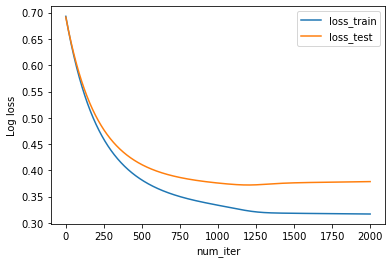

In [686]:
plt.plot(losses_train, label="loss_train")
plt.plot(losses_test,  label="loss_test")
plt.xlabel('num_iter')
plt.ylabel('Log loss')
plt.legend()
plt.show()